In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
#import joblib

In [4]:
austria_df = pd.read_csv(f'../data/Processed/time_series_processed_2.csv')
austria_df.set_index('utc_timestamp')

,Unnamed: 0,load_actual,load_forecast,price,solar_generation,Wind_generation,Weekday,Hour,Month,load_t-1,load_t-24,load_rolling_24h
utc_timestamp,,,,,,,,,,,,
2015-02-01 00:00:00+00:00,0,6241.0,6186.0,25.0,0.0,131.0,Sunday,0,February,6241.0,6241.0,6967.625000
2015-02-01 01:00:00+00:00,1,6126.0,6111.0,24.0,0.0,119.0,Sunday,1,February,6241.0,6241.0,6967.625000
2015-02-01 02:00:00+00:00,2,5983.0,6019.0,24.0,0.0,89.0,Sunday,2,February,6126.0,6241.0,6967.625000
2015-02-01 03:00:00+00:00,3,5966.0,6027.0,24.0,0.0,56.0,Sunday,3,February,5983.0,6241.0,6967.625000
2015-02-01 04:00:00+00:00,4,6004.0,6247.0,24.0,0.0,56.0,Sunday,4,February,5966.0,6241.0,6967.625000
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00+00:00,32107,6073.0,5774.0,60.0,0.0,1674.0,Sunday,19,September,6533.0,6156.0,5715.500000
2018-09-30 20:00:00+00:00,32108,6091.0,5712.0,58.0,0.0,1773.0,Sunday,20,September,6073.0,6033.0,5717.916667
2018-09-30 21:00:00+00:00,32109,5705.0,5355.0,50.0,0.0,1829.0,Sunday,21,September,6091.0,5612.0,5721.791667


In [5]:
austria_df.drop(columns="Unnamed: 0", inplace= True)

In [6]:
austria_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32112 entries, 0 to 32111
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   utc_timestamp     32112 non-null  object 
 1   load_actual       32112 non-null  float64
 2   load_forecast     32112 non-null  float64
 3   price             32112 non-null  float64
 4   solar_generation  32112 non-null  float64
 5   Wind_generation   32112 non-null  float64
 6   Weekday           32112 non-null  object 
 7   Hour              32112 non-null  int64  
 8   Month             32112 non-null  object 
 9   load_t-1          32112 non-null  float64
 10  load_t-24         32112 non-null  float64
 11  load_rolling_24h  32112 non-null  float64
dtypes: float64(8), int64(1), object(3)
memory usage: 2.9+ MB


### Converting the Weekdays and month

In [7]:
weekday_map = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

austria_df['Weekday'] = austria_df['Weekday'].map(weekday_map)

In [8]:
Monthly_map = {
    'January': 0,
    'February': 1,
    'March': 2,
    'April': 3,
    'May': 4,
    'June': 5,
    'July': 6,
    'August': 7,
    'September': 8,
    'October': 9,
    'November': 10,
    'December': 11,
}

austria_df['Month'] = austria_df['Month'].map(Monthly_map)

In [9]:
'''
An alternative method to create some feature but we are not using it.

austria_df = pd.get_dummies(austria_df, columns=['Weekday'], drop_first=True)
austria_df = pd.get_dummies(austria_df, columns=['Month'], drop_first=True)

features = [
    'load_forecast', 'solar_generation', 'Wind_generation',
    'Hour', 'load_t-1', 'load_t-24', 'load_rolling_24h'
] + [col for col in austria_df.columns if col.startswith('Weekday_') or col.startswith('Month_')] '''

"\nAn alternative method to create some feature but we are not using it.\n\naustria_df = pd.get_dummies(austria_df, columns=['Weekday'], drop_first=True)\naustria_df = pd.get_dummies(austria_df, columns=['Month'], drop_first=True)\n\nfeatures = [\n    'load_forecast', 'solar_generation', 'Wind_generation',\n    'Hour', 'load_t-1', 'load_t-24', 'load_rolling_24h'\n] + [col for col in austria_df.columns if col.startswith('Weekday_') or col.startswith('Month_')] "

In [10]:
austria_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32112 entries, 0 to 32111
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   utc_timestamp     32112 non-null  object 
 1   load_actual       32112 non-null  float64
 2   load_forecast     32112 non-null  float64
 3   price             32112 non-null  float64
 4   solar_generation  32112 non-null  float64
 5   Wind_generation   32112 non-null  float64
 6   Weekday           32112 non-null  int64  
 7   Hour              32112 non-null  int64  
 8   Month             32112 non-null  int64  
 9   load_t-1          32112 non-null  float64
 10  load_t-24         32112 non-null  float64
 11  load_rolling_24h  32112 non-null  float64
dtypes: float64(8), int64(3), object(1)
memory usage: 2.9+ MB


### Spliting data for train and test

In [11]:
# Training set 2015 and 2016
train_df = austria_df.loc['2015-02-01':'2017-06-31']

# Testing set 2017
test_df = austria_df.loc['2016-07-01':'2018-09-30']

In [12]:
# Features
target = 'price'
features = [
    'load_forecast', 'solar_generation', 'Wind_generation',
    'Hour', 'Month', 'load_t-1', 'load_t-24', 'load_rolling_24h','Weekday']

# Train
X_train = train_df[features]
y_train = train_df[target]

# Test
X_test = test_df[features]
y_test = test_df[target]

### Gradiant Boost Regressor

In [13]:
# Initiating the model
simple_gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.02, max_depth=5, random_state=42)

# Fit
simple_gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.02, max_depth=5, n_estimators=200,
                          random_state=42)

In [14]:
# Prediction the test data
y_pred = simple_gbr.predict(X_test)

# Creating the performance metrix
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2S:", r2_score(y_test, y_pred))

RMSE: 2.290321523351232
R2S: 0.8463961147781578


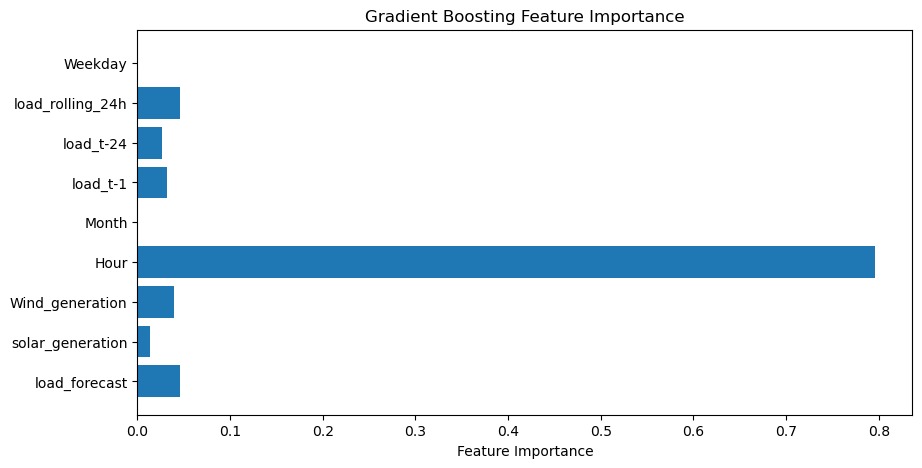

In [15]:
importances = simple_gbr.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(10, 5))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Gradient Boosting Feature Importance")
plt.show()

In [16]:
### Checking why error is high
print(austria_df['price'].describe())

count    32112.000000
mean        33.988883
std         14.888293
min        -76.000000
25%         25.000000
50%         33.000000
75%         42.000000
max        143.000000
Name: price, dtype: float64


In [17]:
negative_price = austria_df[austria_df['price'] < 0]

In [18]:
negative_price.describe()

,load_actual,load_forecast,price,solar_generation,Wind_generation,Weekday,Hour,Month,load_t-1,load_t-24,load_rolling_24h
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,5910.387006,6042.847458,-13.929379,135.353107,1061.223164,4.090395,8.166667,5.985876,5963.259887,6320.663842,6610.498470
std,763.699365,789.974873,13.753108,210.639380,698.605713,2.410498,6.965550,4.074702,783.520225,960.189646,900.689386
min,2539.000000,4043.000000,-76.000000,0.000000,38.000000,0.000000,0.000000,0.000000,2672.000000,2672.000000,2186.375000
25%,5388.250000,5467.500000,-20.000000,0.000000,512.750000,1.000000,2.000000,2.000000,5439.250000,5605.000000,6003.645833
50%,5848.500000,5981.500000,-9.000000,0.000000,920.000000,5.000000,6.000000,5.000000,5866.000000,6226.000000,6555.854167
75%,6312.000000,6614.000000,-4.000000,256.500000,1660.500000,6.000000,12.000000,10.000000,6395.750000,6929.250000,7213.604167
max,8250.000000,8190.000000,-1.000000,798.000000,2548.000000,6.000000,23.000000,11.000000,8422.000000,9154.000000,8799.916667


### Checking the distribution of negative prices

c:\Users\rande\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


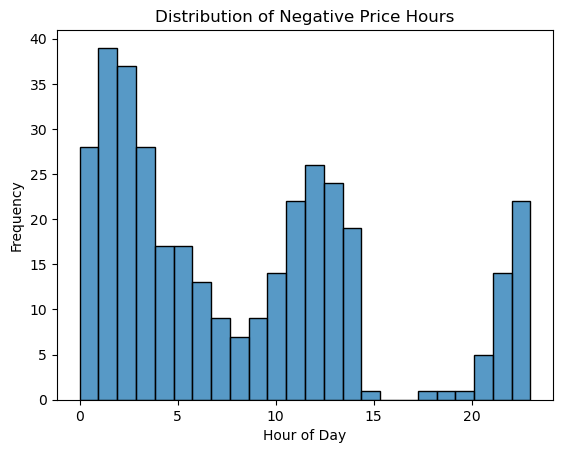

In [19]:
sns.histplot(negative_price['Hour'], bins=24, kde=False)
plt.title("Distribution of Negative Price Hours")
plt.xlabel("Hour of Day")
plt.ylabel("Frequency")
plt.show()

### Using Grid search for futurther improving the Model 
using 'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7] and 'learning_rate': [0.01, 0.1, 0.2]

In [20]:
from sklearn.model_selection import GridSearchCV

# Parameter
param_grid = {'n_estimators': [100, 200, 300],'max_depth': [3, 5, 7],'learning_rate': [0.01, 0.1, 0.2]}


'''cv=3	3-fold cross-validation (train/val split x3)
n_jobs=-1	Uses all CPU cores to run in parallel
scoring='r2'	Optimizes based on the R² score
verbose=3	Shows progress in the console'''

# Creating model for best params search
gbr_with_CV = GradientBoostingRegressor(random_state=42)
Gridsearch_CV = GridSearchCV(estimator= gbr_with_CV , param_grid=param_grid,cv=3, n_jobs=-1, verbose=3, scoring='r2')
Gridsearch_CV.fit(X_train, y_train)
Gridsearch_CV.best_params_

Fitting 3 folds for each of 27 candidates, totalling 81 fits


{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}

In [21]:
# Checking the result with best params
gbr_best_m = Gridsearch_CV.best_estimator_
y_pred = gbr_best_m.predict(X_test)

# Calculating Errors
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MSE: 8.165010243468453
R² Score: 0.7609074599277174


The high erros might be due to overfitting

In [22]:
# using time series split
from sklearn.model_selection import TimeSeriesSplit

CV_using_timeSS = TimeSeriesSplit(n_splits=5)
Gridsearch_new_CV = GridSearchCV(estimator= gbr_with_CV , param_grid=param_grid,cv=CV_using_timeSS, n_jobs=-1, verbose=3, scoring='r2')
Gridsearch_new_CV.fit(X_train, y_train)
Gridsearch_new_CV.best_params_

Fitting 5 folds for each of 27 candidates, totalling 135 fits


{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}

In [23]:
# Checking the result with best params
gbr_best_m_new_CV = Gridsearch_new_CV.best_estimator_
y_pred = gbr_best_m_new_CV.predict(X_test)

# Calculating Errors
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 8.165003949503888
R² Score: 0.7609076442312185


Due to high negative prices (which might be due to high renewable energy generation) we are getting high MSE - 
After tunning using (using grid search CV), it show even more error that might be due to overfitting.

- Also the data set has very less feature - more features like weather condition - also generation from coal, nuclear, hydro should taking into account for better prediction.

### Using different models to check the performance

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [25]:
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(),
}

# checking all the models accuracy
for name, model in models.items():
    model.fit(X_train, y_train)
    new_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, new_pred)
    r2 = r2_score(y_test, new_pred)
    print(f"{name} → MSE: {mse:.2f}, R²: {r2:.3f}")

LinearRegression → MSE: 6.61, R²: 0.806
RandomForest → MSE: 11.55, R²: 0.662
XGBoost → MSE: 8.30, R²: 0.757


GradientBoostingRegressor(learning_rate=0.02, max_depth=5, n_estimators=200,random_state=42) -- This model perform the best among all.